# Benchmarking Results

In [1]:
from capo.analysis.utils import (
    get_results,
    aggregate_results,
    get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_scores,
    plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
)

In [2]:
OPTIMS = ["CAPO", "EvoPromptGA", "OPRO", "PromptWizard"]
DATASETS = ["sst-5", "agnews", "copa", "gsm8k", "subj"]
MODELS = ["llama", "mistral", "qwen"]

In [3]:
%load_ext autoreload
%autoreload 2

Failed to load sst-5 for CAPO: No objects to concatenate
Failed to load sst-5 for EvoPromptGA: No objects to concatenate
Failed to load agnews for CAPO: No objects to concatenate
Failed to load copa for CAPO: No objects to concatenate
Failed to load copa for EvoPromptGA: No objects to concatenate
Failed to load copa for EvoPromptGA: No objects to concatenate
Failed to load gsm8k for EvoPromptGA: No objects to concatenate
Failed to load gsm8k for EvoPromptGA: No objects to concatenate
Failed to load subj for EvoPromptGA: No objects to concatenate


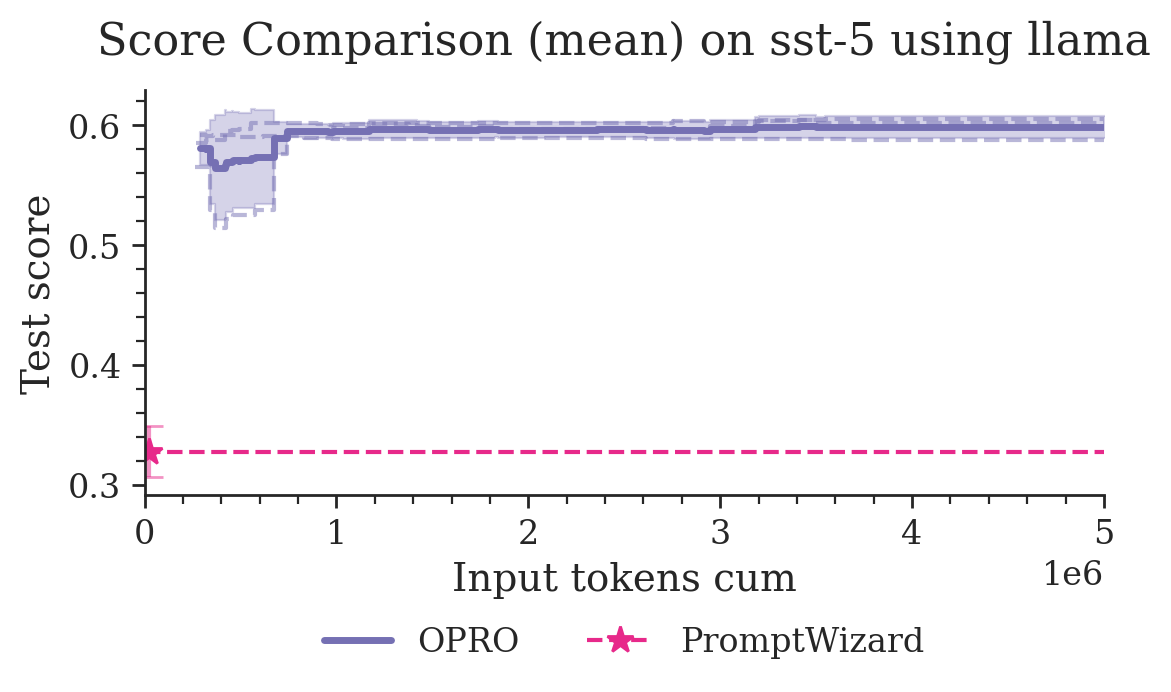

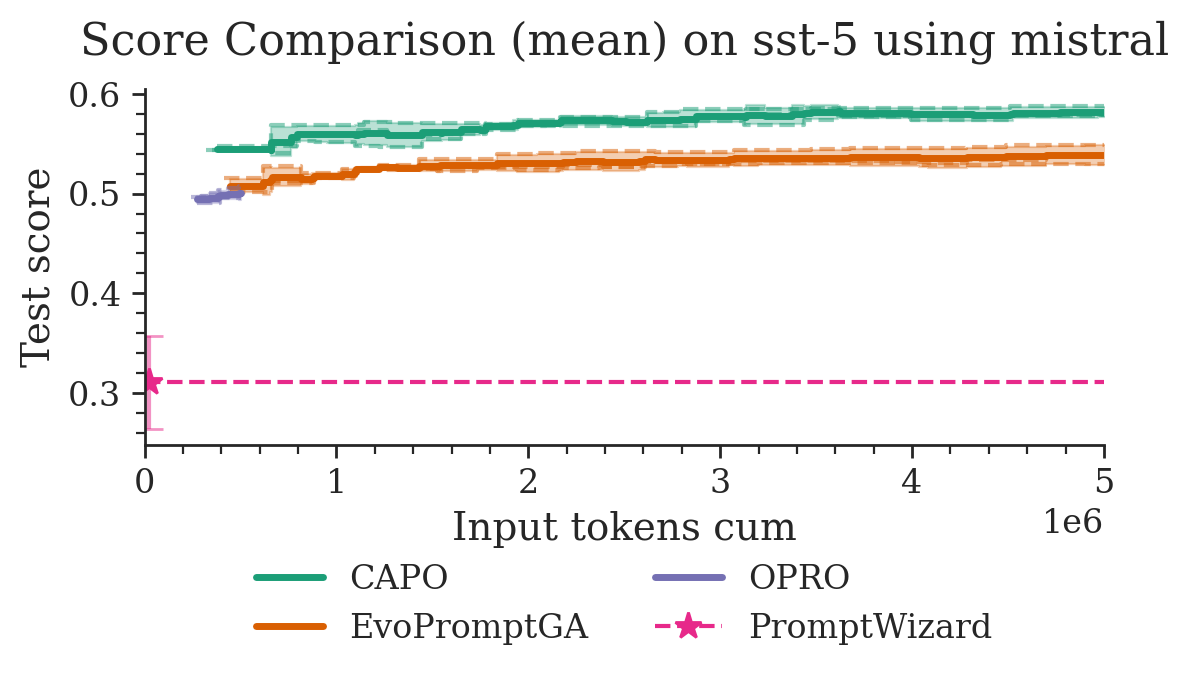

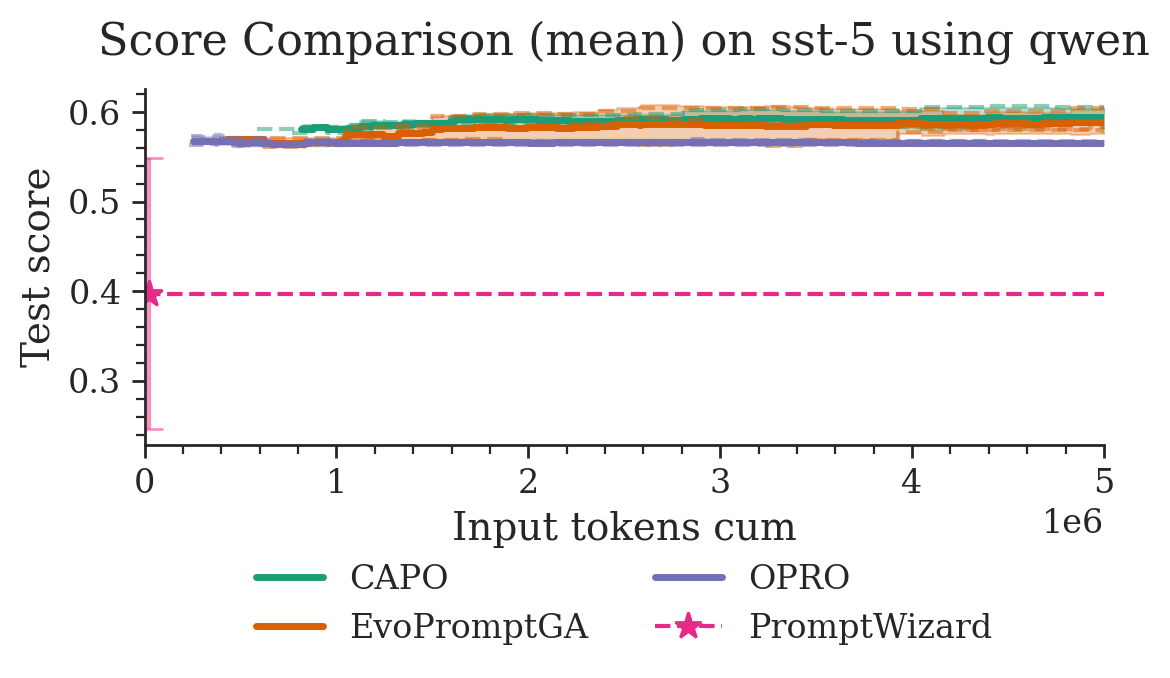

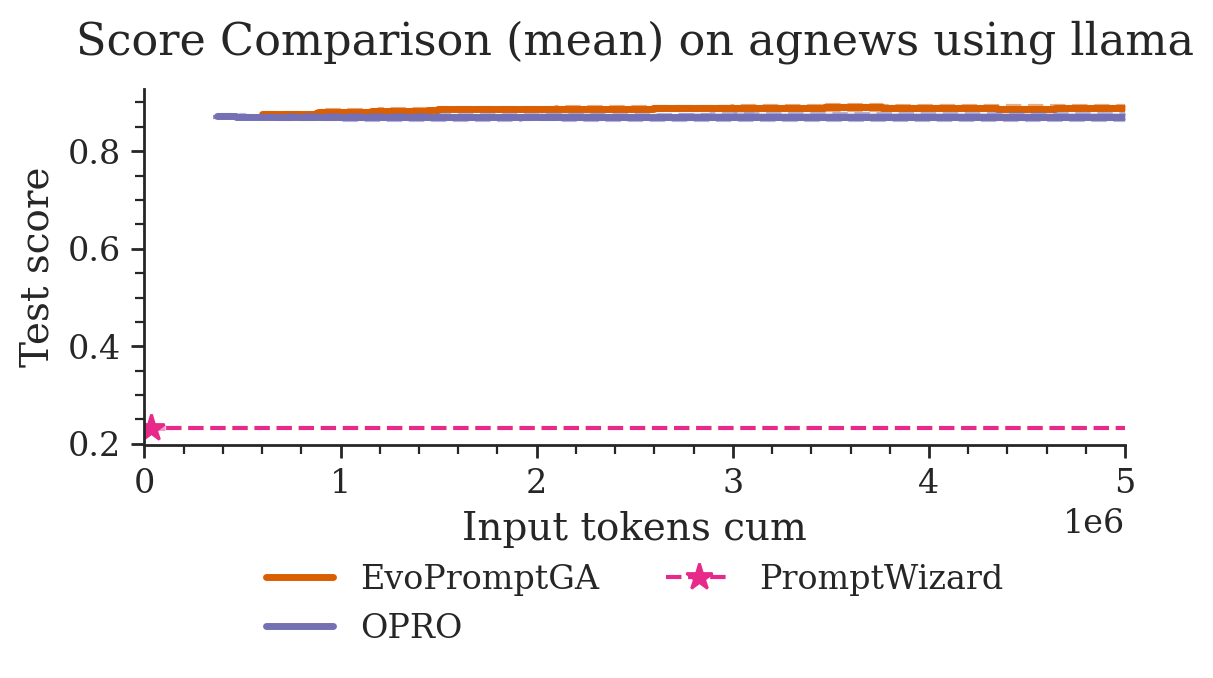

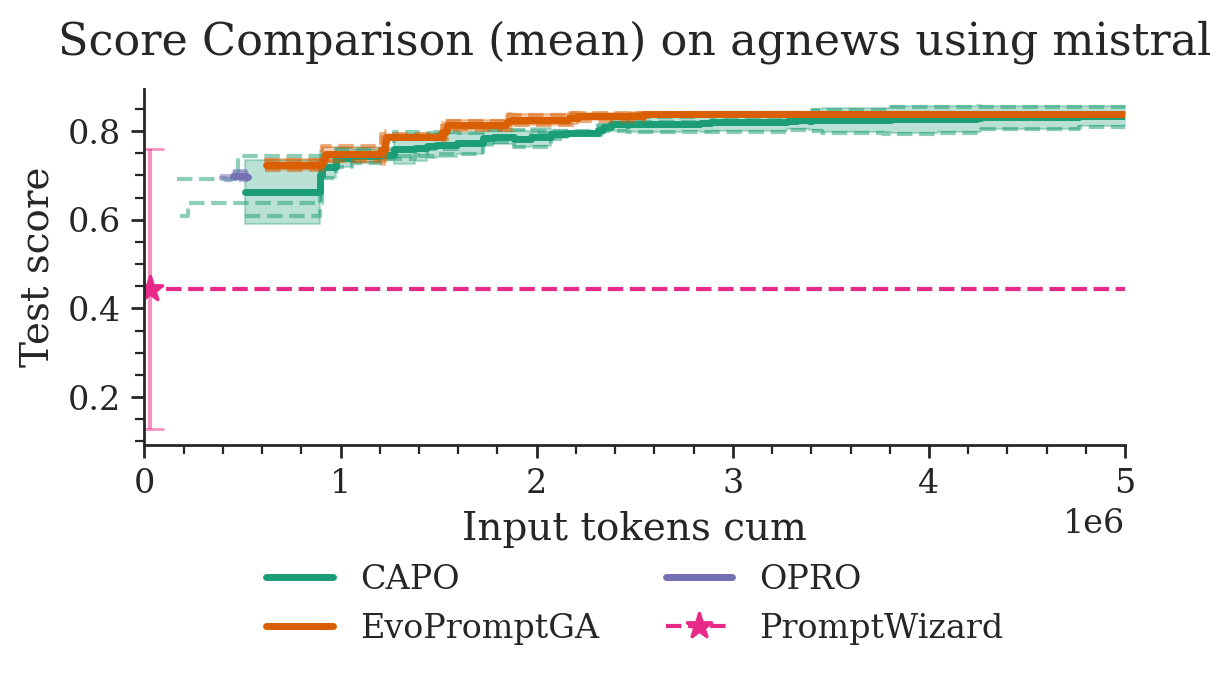

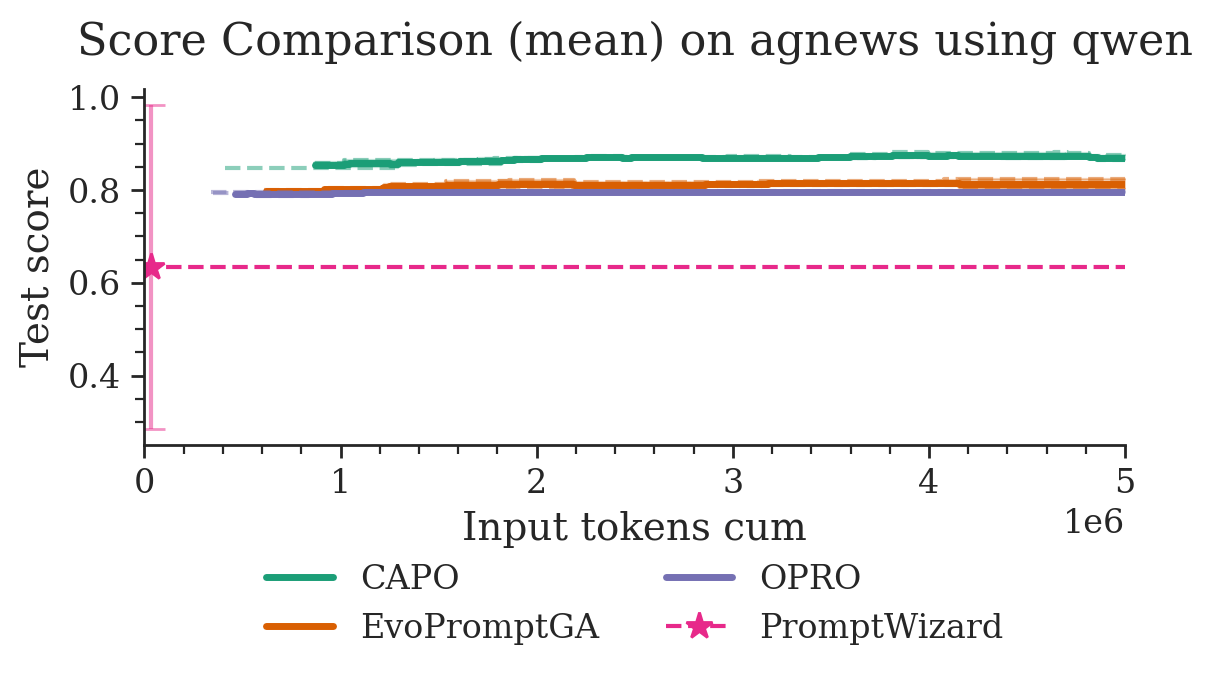

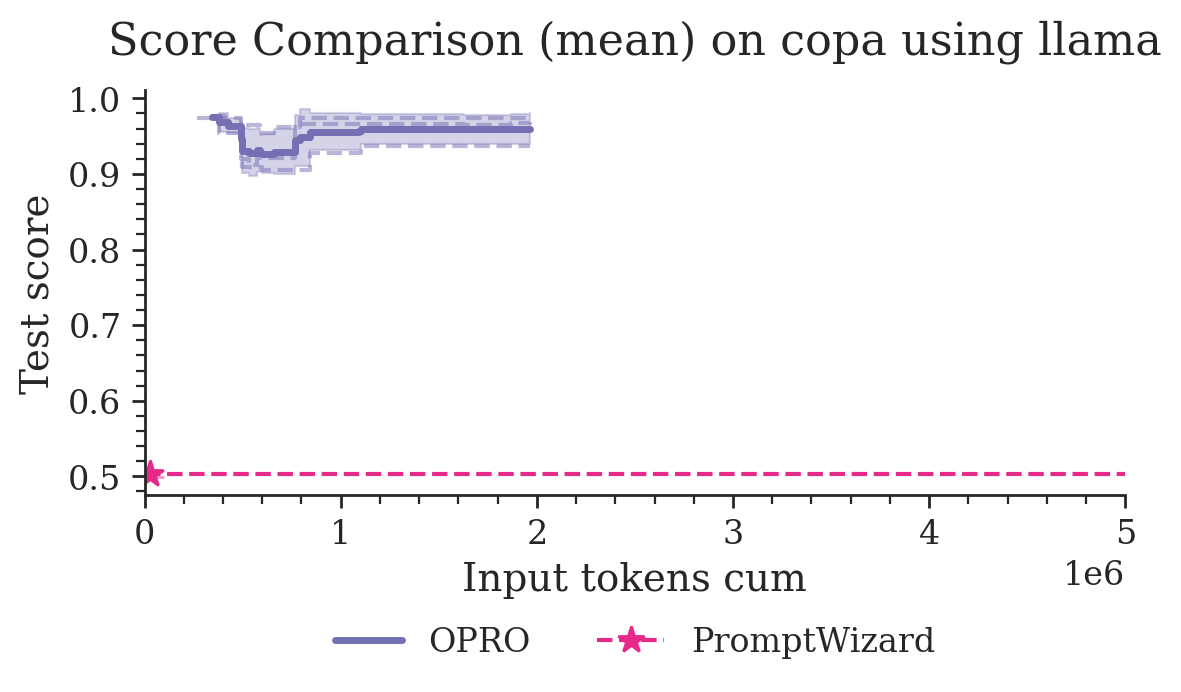

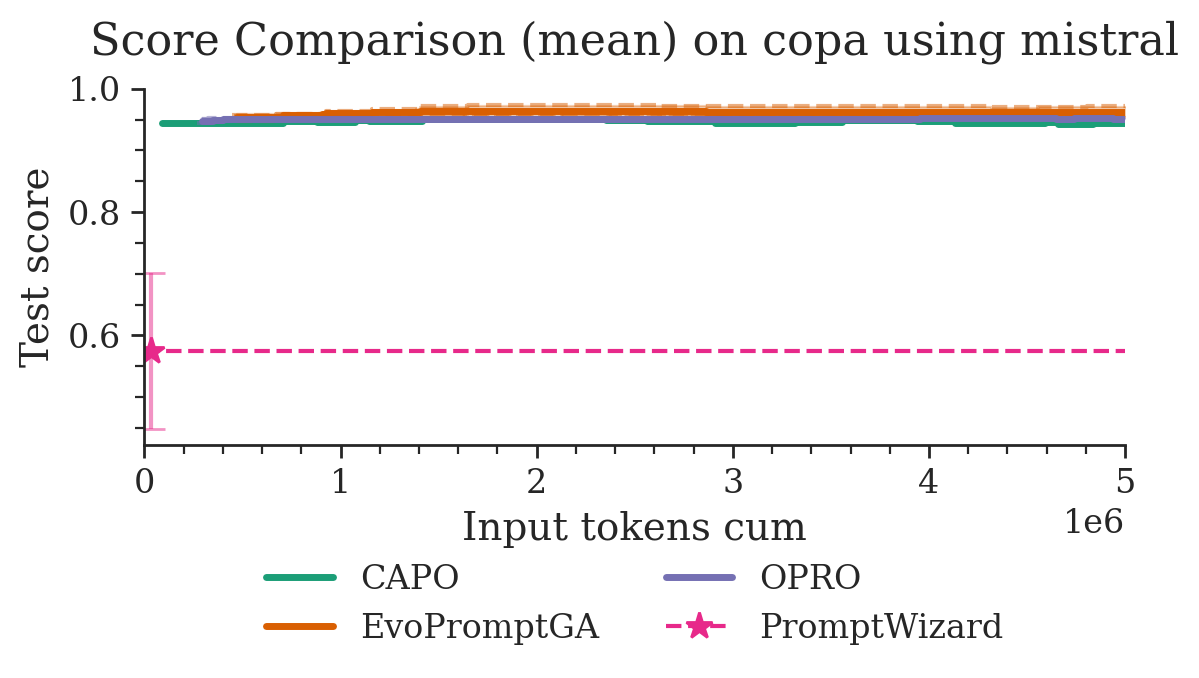

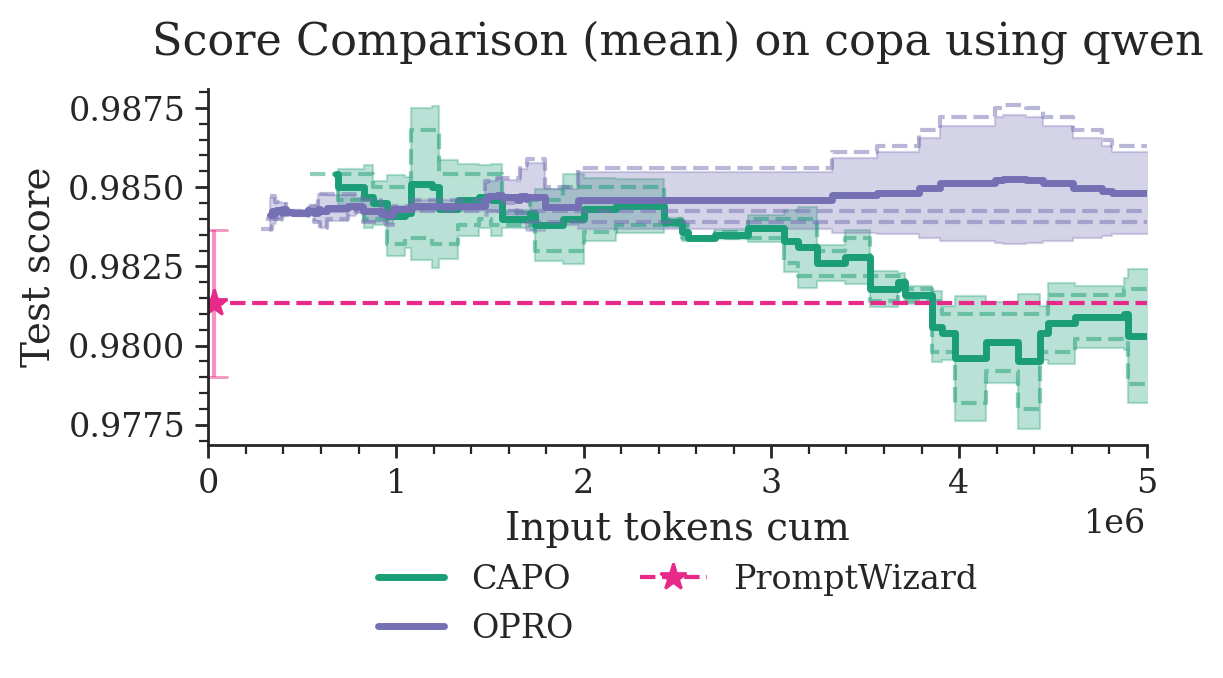

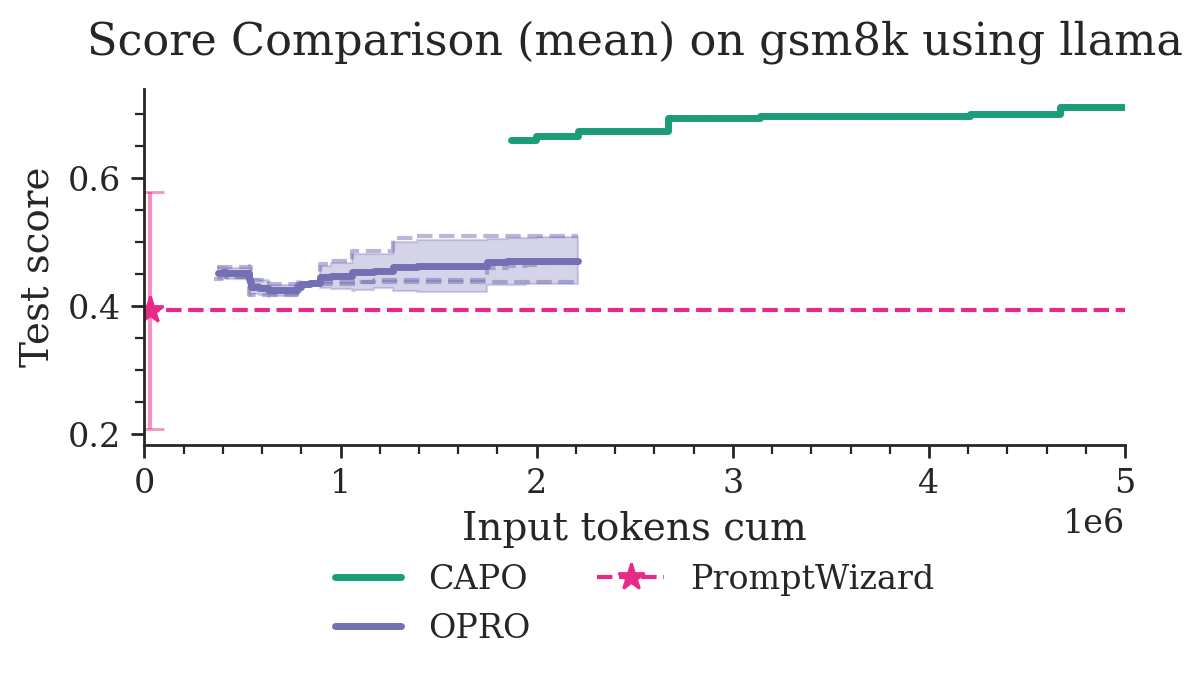

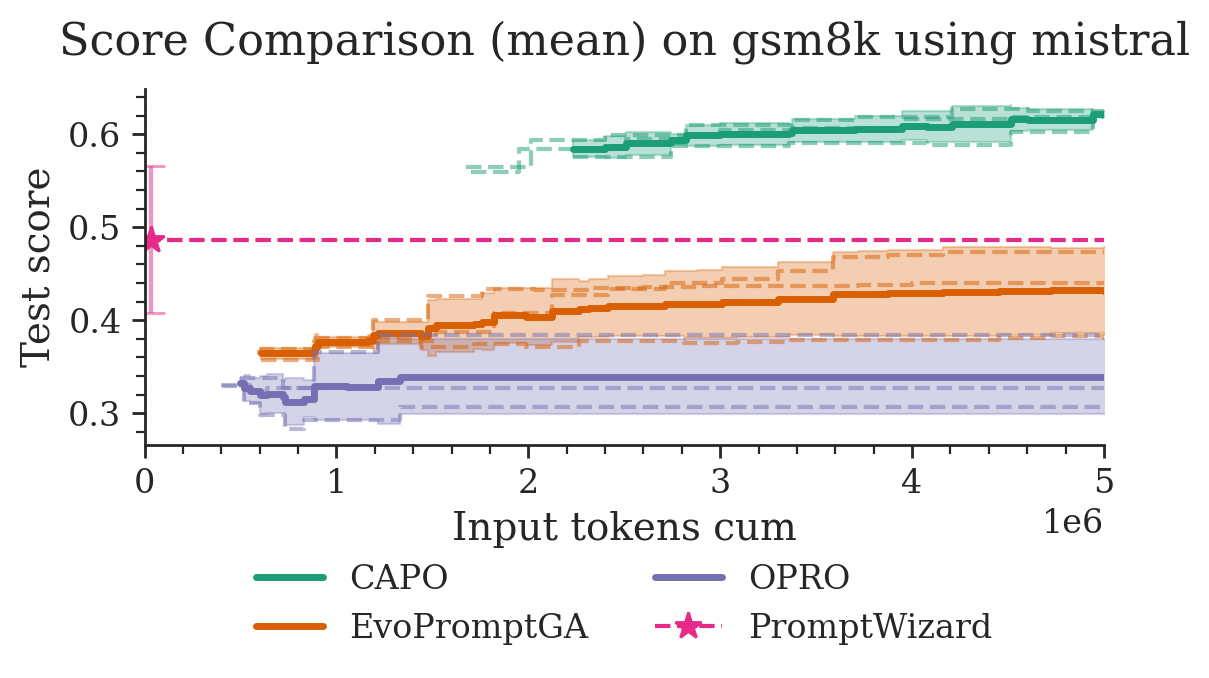

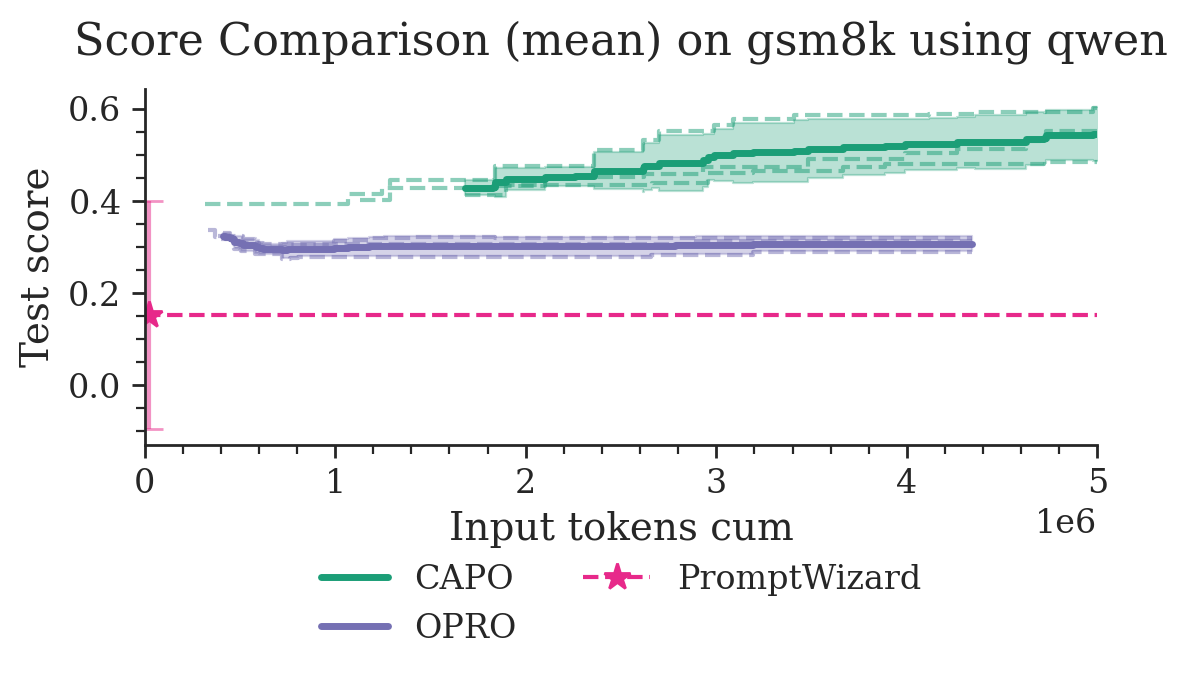

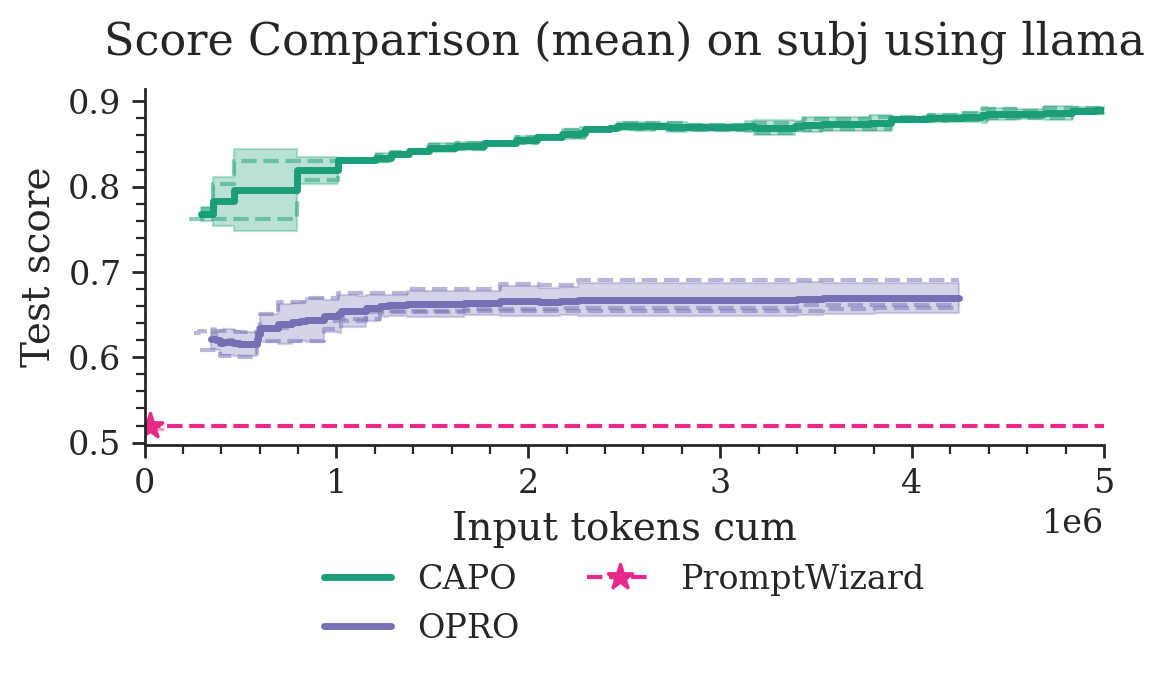

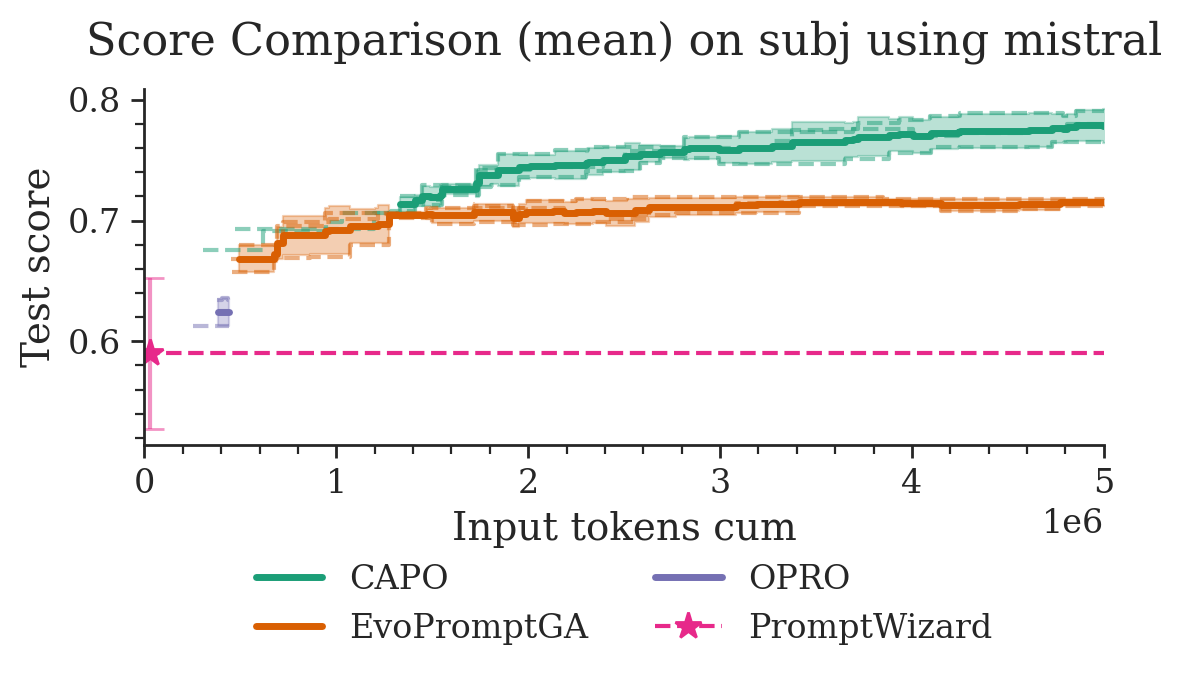

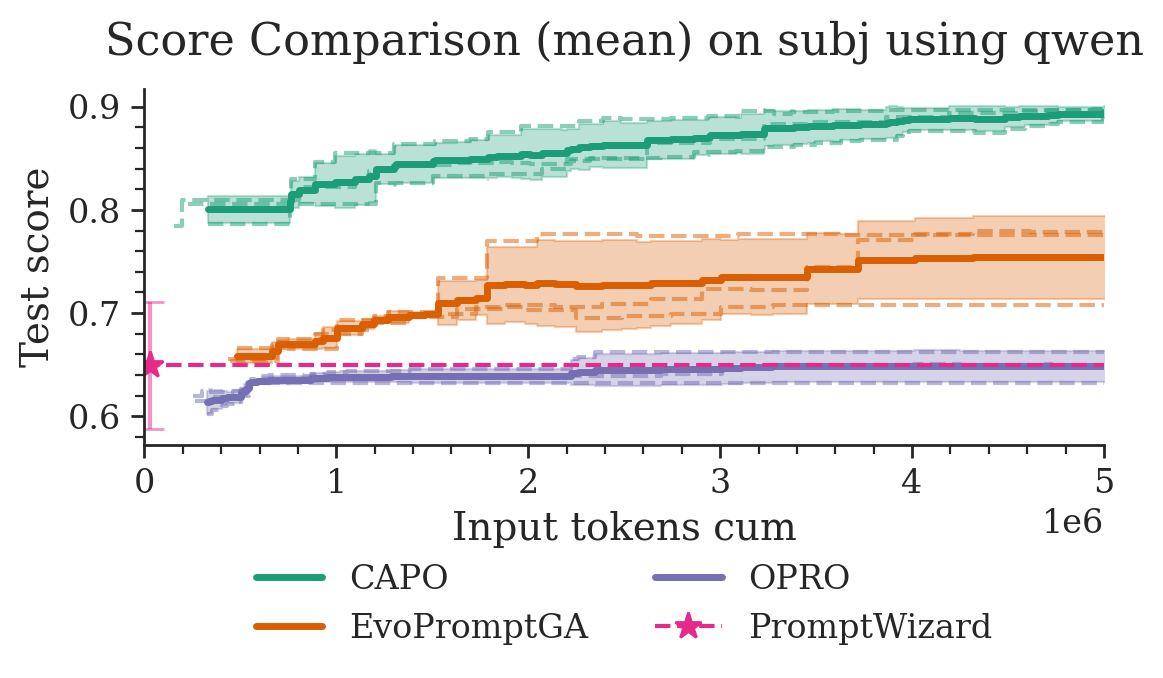

In [6]:
for dataset in DATASETS:
    for model in MODELS:
        plot_population_scores_comparison(
            dataset,
            model,
            OPTIMS,
            agg="mean",
            plot_seeds=True,
            plot_stddev=True,
            x_col="input_tokens_cum",
            path_prefix="../..",
        )

Candidates for main paper
- GSM8K (because its most relevant dataset)
- Subj using qwen (because it has beautiful curves)

Takeaways:
- PromptWizard's performance is highly dependend on model used (=> strict templates!)

# Table Results

In [7]:
for model in MODELS:
    print(f"Model: {model}")
    display(generate_comparison_table(model=model, cutoff_tokens=1_000_000, path_prefix="../.."))

Model: llama
Failed to load sst-5 for CAPO: No objects to concatenate
No results found for sst-5 and CAPO
Failed to load agnews for CAPO: No objects to concatenate
No results found for agnews and CAPO
Failed to load copa for CAPO: No objects to concatenate
No results found for copa and CAPO
Failed to load sst-5 for EvoPromptGA: No objects to concatenate
No results found for sst-5 and EvoPromptGA
Failed to load copa for EvoPromptGA: No objects to concatenate
No results found for copa and EvoPromptGA
Failed to load gsm8k for EvoPromptGA: No objects to concatenate
No results found for gsm8k and EvoPromptGA
Failed to load subj for EvoPromptGA: No objects to concatenate
No results found for subj and EvoPromptGA


,agnews,copa,gsm8k,sst-5,subj,avg
CAPO,nan±nan,nan±nan,nan±nan,nan±nan,90.2±0.0,90.2
EvoPromptGA,88.7±0.5,nan±nan,nan±nan,nan±nan,nan±nan,88.73
OPRO,88.2±0.6,98.1±0.7,51.7±2.3,59.3±1.5,71.3±3.4,73.73
PromptWizard,23.3±0.2,50.3±0.4,39.3±18.5,32.8±2.1,51.9±0.3,39.55


Model: mistral


,agnews,copa,gsm8k,sst-5,subj,avg
CAPO,84.1±1.9,96.6±nan,nan±nan,56.7±1.4,77.0±2.8,78.62
EvoPromptGA,83.9±1.5,96.3±0.8,41.1±3.6,54.2±2.4,77.8±0.0,70.67
OPRO,84.2±0.2,96.3±0.4,43.5±0.6,54.9±0.5,76.9±0.4,71.17
PromptWizard,44.4±31.6,57.5±12.6,48.7±7.9,31.1±4.7,59.0±6.2,48.12


Model: qwen
Failed to load copa for EvoPromptGA: No objects to concatenate
No results found for copa and EvoPromptGA
Failed to load gsm8k for EvoPromptGA: No objects to concatenate
No results found for gsm8k and EvoPromptGA


,agnews,copa,gsm8k,sst-5,subj,avg
CAPO,87.3±1.0,98.8±0.3,54.4±nan,59.9±1.1,87.1±2.2,77.49
EvoPromptGA,80.3±0.9,nan±nan,nan±nan,57.1±0.8,71.9±1.9,69.76
OPRO,80.0±0.0,98.3±0.1,46.3±3.8,57.4±0.2,69.4±0.7,70.29
PromptWizard,63.5±34.9,98.1±0.2,15.3±24.7,39.7±15.1,64.9±6.1,56.31


In [ ]:
for model in MODELS:
    print(f"Model: {model}")
    display(
        generate_comparison_table(model=model, cutoff_tokens=3_000_000, path_prefix="../temp/res/")
    )

In [ ]:
for model in MODELS:
    print(f"Model: {model}")
    display(generate_comparison_table(model=model, path_prefix="../temp/res/"))

In [ ]:
for dataset in DATASETS:
    for model in MODELS:
        plot_length_score(
            dataset,
            model,
            OPTIMS,
            x_col="prompt_len",
            score_col="test_score",
            log_scale=False,
            path_prefix="../temp/res/",
        )

=> maybe we are cost aware in the sense that we are evaluating the entire "front" (EvoPrompt and Opro are very short and Promptwizard very long)

- promptwizard has extremly long prompts, that only sometimes can compete with competitors

=> interesting for plotting: 
- subj using qwen or gsm8k using mistral => shows that we have a huge range

In [ ]:
from pprint import pprint as pp

In [ ]:
# print best prompt per dataset, model, optimizer
for dataset in DATASETS:
    for model in MODELS:
        for optim in OPTIMS:
            print(f"Dataset: {dataset}, Model: {model}, Optimizer: {optim}")
            df = get_results(
                dataset=dataset,
                model=model,
                optim=optim,
                # sort_by="test_score",
                # ascending=False,
            )

            if df.empty:
                continue
            p, s = df.nlargest(1, "test_score")[["prompt", "test_score"]].values[0]
            print(s)
            print("'''")
            pp(p)
            print("'''")

capo can be very repetitive? (SST-5 mistral) potentially the crossover meta prompt has been misinterpreted (merge the two prompts) => however it is performing superior!

subj for qwen and llama with capo has a crazy outlier to the top
